<a href="https://colab.research.google.com/github/OddIndustry7616/Iris/blob/main/Iris_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Import libraries

In [1]:
import pandas as pd #for data manipulation
import matplotlib.pyplot as plt #for data visualization
import seaborn as sns

#Load the dataset

In [ ]:
iris_data = pd.read_csv('IRIS.csv', names=names)

In [ ]:
iris_data.dtypes

,0
sepal_length,object
sepal_width,object
petal_length,object
petal_width,object
class,object


In [ ]:
iris_data['sepal_length'] = pd.to_numeric(iris_data['sepal_length'], errors='coerce')
iris_data['sepal_width'] = pd.to_numeric(iris_data['sepal_width'], errors='coerce')
iris_data['petal_length'] = pd.to_numeric(iris_data['petal_length'], errors='coerce')
iris_data['petal_width'] = pd.to_numeric(iris_data['petal_width'], errors='coerce')


In [ ]:
iris_data.dtypes

,0
sepal_length,float64
sepal_width,float64
petal_length,float64
petal_width,float64
class,object


In [ ]:
iris_data

,sepal_length,sepal_width,petal_length,petal_width,class
0,NaN,NaN,NaN,NaN,species
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
...,...,...,...,...,...
146,6.7,3.0,5.2,2.3,Iris-virginica
147,6.3,2.5,5.0,1.9,Iris-virginica
148,6.5,3.0,5.2,2.0,Iris-virginica
149,6.2,3.4,5.4,2.3,Iris-virginica


In [ ]:
iris_data = iris_data[1:]               # Drop the first row

# Reset index
iris_data.reset_index(drop=True, inplace=True)

In [ ]:
iris_data

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


#Plots

##Scatter plot

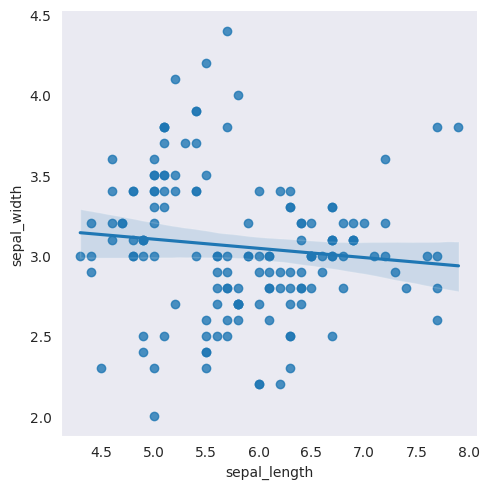

In [ ]:
sns.lmplot(x='sepal_length', y='sepal_width', data= iris_data)


### add color by species

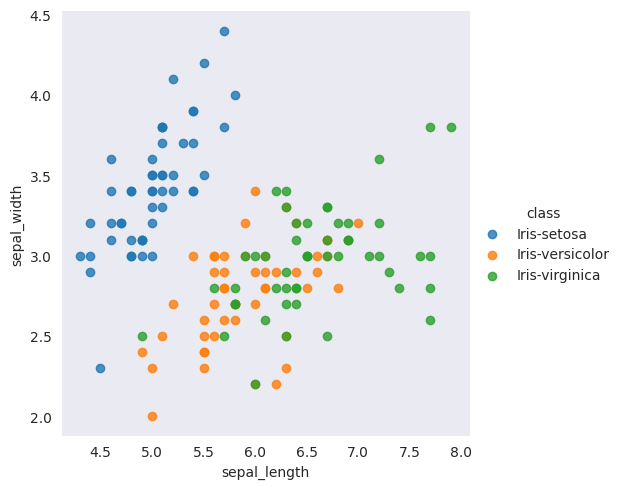

In [ ]:
sns.lmplot(x='sepal_length', y='sepal_width', data=iris_data,
           fit_reg=False, # No regression line
           hue='class')   # Color by species

##Boxplot

<Axes: >

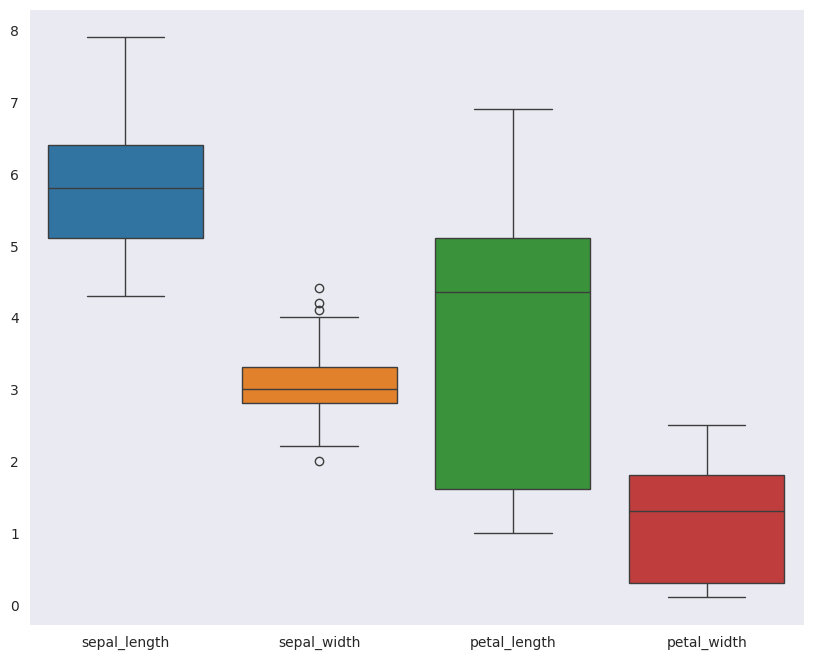

In [ ]:
plt.figure(figsize=(10,8))
sns.boxplot(data=iris_data)

##Violin Plot

In [ ]:
#creating color a color palette by species

species_colors = ['#78C850',  # Setosa
                    '#F08030',  # Versicolor
                    '#6890F0',  # Verginica
                  ]

<ipython-input-89-40eec6818dd9>:2: UserWarning: 
The palette list has fewer values (3) than needed (4) and will cycle, which may produce an uninterpretable plot.
  sns.violinplot( data=iris_data,


<Axes: >

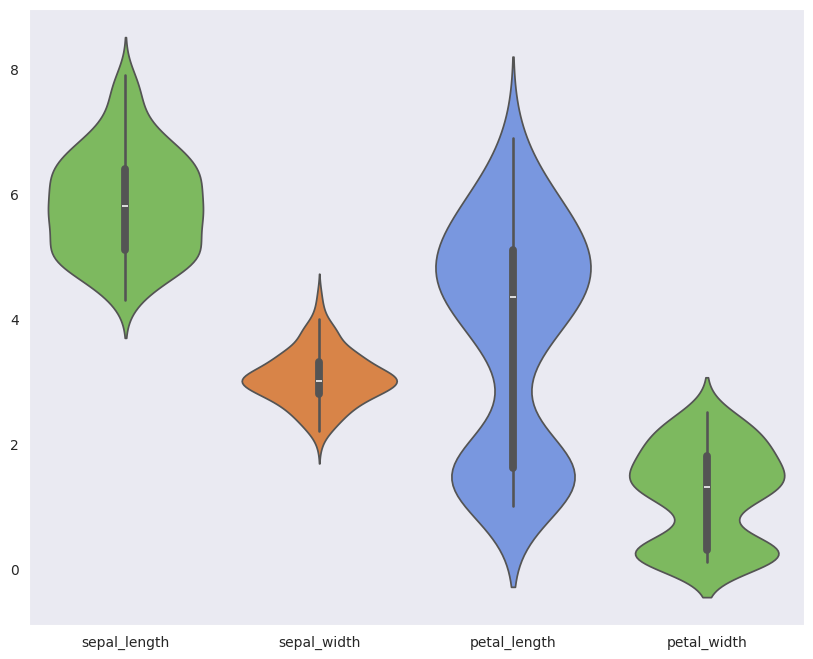

In [ ]:
plt.figure(figsize=(10,8))
sns.violinplot( data=iris_data,
               palette=species_colors)

##Swarm plot

<ipython-input-90-3ee079f31506>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.swarmplot(y='petal_length', x='class', data=iris_data,


<Axes: xlabel='class', ylabel='petal_length'>

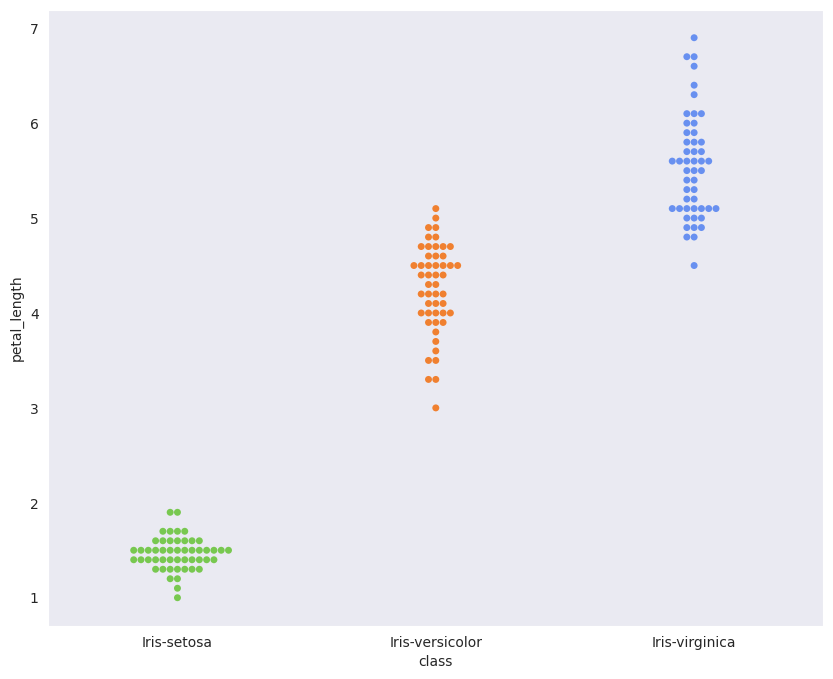

In [ ]:
plt.figure(figsize=(10,8))
sns.swarmplot(y='petal_length', x='class', data=iris_data,
              palette=species_colors)

##Combining plots

<ipython-input-91-b2330c41c727>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='class',


Text(0.5, 1.0, 'Combined Plot')

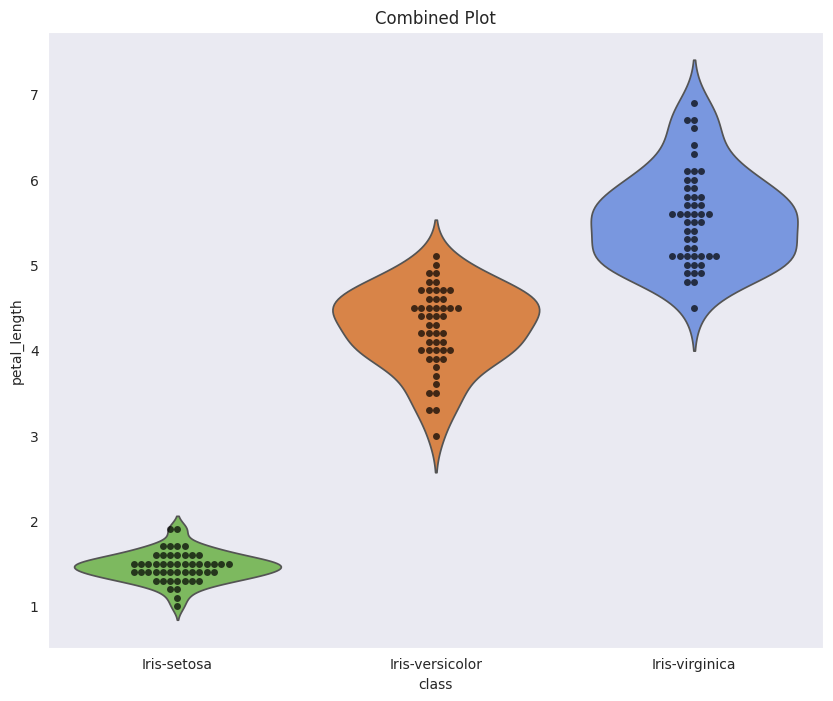

In [ ]:
plt.figure(figsize=(10,8))

sns.violinplot(x='class',
               y='petal_length',
               data=iris_data,
               inner=None, # Remove the bars inside the violins
               palette=species_colors)

sns.swarmplot(y='petal_length',
              x='class',
              data=iris_data,
              color='k', # Make points black
              alpha=0.7) # and slight transparency

# Set title with matplotlib
plt.title('Combined Plot')

##Histogram

<Axes: xlabel='petal_length', ylabel='Count'>

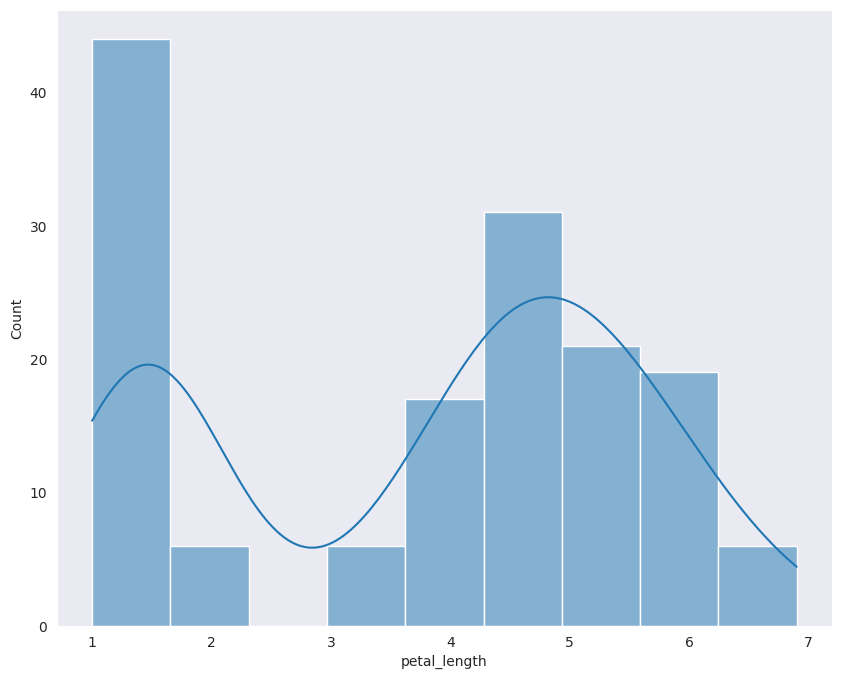

In [ ]:
plt.figure(figsize=(10,8))
sns.histplot(iris_data, x='petal_length',
             kde=True)

##Bar plot

<ipython-input-93-69ec5fa0df3c>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='class', data=iris_data, palette=species_colors)


([0, 1, 2],
 [Text(0, 0, 'Iris-setosa'),
  Text(1, 0, 'Iris-versicolor'),
  Text(2, 0, 'Iris-virginica')])

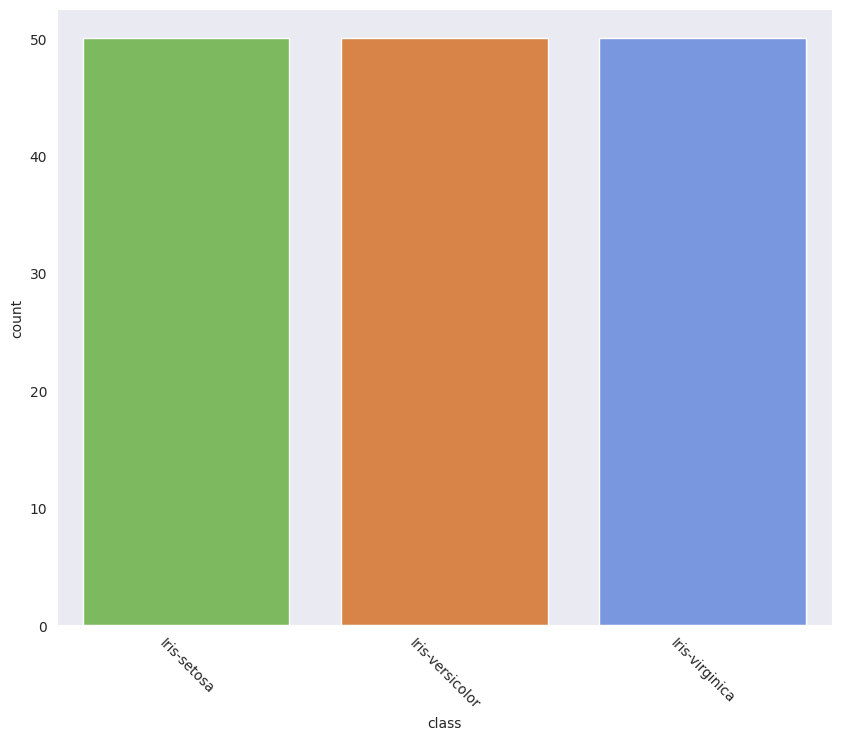

In [ ]:
plt.figure(figsize=(10,8))
sns.countplot(x='class', data=iris_data, palette=species_colors)
plt.xticks(rotation=-45)

#Machine learning

In [ ]:
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split


##Modeling with scikit-learn

In [ ]:
X = iris_data.drop(['class'], axis=1)
y = iris_data['class']
# print(X.head())
print(X.shape)
# print(y.head())
print(y.shape)

(150, 4)
(150,)


##Split the dataset into a training set and a testing set

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=5)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(90, 4)
(90,)
(60, 4)
(60,)


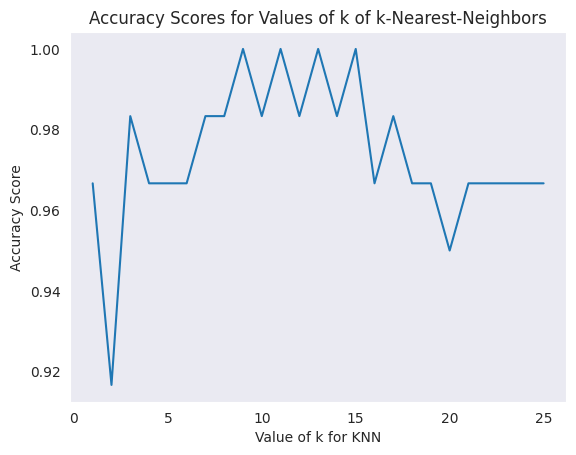

In [ ]:
# experimenting with different n values
k_range = list(range(1,26))
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores.append(metrics.accuracy_score(y_test, y_pred))

plt.plot(k_range, scores)
plt.xlabel('Value of k for KNN')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Scores for Values of k of k-Nearest-Neighbors')
plt.show()

In [ ]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred))

0.9833333333333333


##Choosing KNN to Model Iris Species Prediction with k = 12

In [ ]:
knn = KNeighborsClassifier(n_neighbors=12)
knn.fit(X, y)

KNeighborsClassifier(n_neighbors=12)

##Prediction

In [ ]:
# make a prediction for an example of an out-of-sample observation
knn.predict([[5.5, 3.3, 1.3, 0.2]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array(['Iris-setosa'], dtype=object)